# <font color='#00878A'>Ciência dos Dados</font>
## Projeto 3
Amanda Carmo    | 
Lucio Hallage    |
Nicole Costa    |
Vitor Miada

In [ ]:
import sklearn 

In [ ]:
sklearn.__version__

### Objetivo
- Conduzir análise de dados com grau elevado de autonomia utilizando técnicas como: regressão linear, regression tree, random forest regression, multinomial naive bayes, regressão logística, decision tree, random forest e clusterização (k-means).


Em nosso projeto iremos analizar a base de dados do jogo League of Legends, para fazer a previsão de vitórias de uma partida baseando-se em um time.
.# ARRUMAR AQUI EM CIMA

Para o nosso projeto utilizamos técnicas como _random forest_, _regressão logística_ e _decision tree_ para criar nosso classificador.

## O que é League of Legends: ##

League of Legends, é um jogo online MOBA (Multiplayer Online Battle Arena) competitivo, no qual dez jogadores, divididos em dois times,  batalham com diferentes personagens que exercem inumeras funções durante a partida. O jogo que permanece em constante atualização, oferece competitividade e muita diversão para todos os jogadores de diferentes níveis de habilidade.


## O funcionamento do jogo :##


No League of Legends, o objetivo do jogo é destruir o néxus (o núcleo) da base inimiga. Para isso, serão 10 jogadores divididos em 2 times, o azul e o vermelho, que se enfrentarão num campo de batalha. Para cada jogador, existe uma função principal, na qual pode ser dividida em 5 funções: o Topo (Top-lane), o Caçador (Jungler), o Meio (Mid-lane), o Atirador (ADC) e o Suporte (SUP). Para saber qual posição cada competidor exercerá, serão escolhidos dentre dos 150 campeões (personagens), apenas 5 para cada time, no qual cada jogador selecionará um para jogar. Cada personagem escolhido, tem seu estilo, e portanto sua função dentre as 5 antes mencionadas.


## Data-Set ##

O dataset é constituido de apenas partidas profissionais entre 2015 a 2018 de todos os servidores. O documento, mostra principalmente, quais campeões cada time selecionou, por exemplo, o "redTopChamp", significa qual campeão o jogador do time vermelho jogou; quais foram os jogadores que jogaram a partida, por exemplo, o "blueJungle", que significa quem jogou como Caçador no time azul; qual time jogou e se ele venceu (1) ou perdeu (0), por exemplo "blueTeamTag", representa a sigla do time azul, e "bResult" igual a 0, significa que ele perdeu. Outros dados como ano, liga, não são relevantes, pois como o objetivo do projeto é estimar quem vai ganhar, quando ocorreu e onde ocorreu não são necessários.

## Preparando o ambiente no jupyter:

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings

Lendo a base de dados:

In [4]:
dados = pd.read_excel('matchinfo-treinamento.xlsx')
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

# <font color='#00878A'>Análise Explorartória</font>

## <font color='#00878A'> Classificador - random forest</font>

### Primeira iteração (união dos dados dos times)

Nesta primeira iteração, o grupo juntou os dados dos adversários em um mesmo jogo, tais como os cinco champions e os nomes dos jogadores dos times e aa duas equipes adversárias, agrupando - os em uma coluna em comum, como mostrado no novo dataframe obtiddo e plotado abaixo.

In [ ]:
dados_testes.dropna(inplace=True)
columnsb=['bResult', 'blueTeamTag', 'blueTop', 'blueTopChamp', 'blueJungle','blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC','blueADCChamp', 'blueSupport', 'blueSupportChamp']
columnsr=['rResult', 'redTeamTag', 'redTop','redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle','redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport','redSupportChamp']
columns=['Result', 'TeamTag', 'Top','TopChamp', 'Jungle', 'JungleChamp', 'Middle','MiddleChamp', 'ADC', 'ADCChamp', 'Support','SupportChamp']


In [ ]:
dados_b = dados[columnsb]
dados_b.columns = columns
dados_r = dados[columnsr]
dados_r.columns = columns

In [ ]:
dados_concat = pd.concat([dados_b, dados_r]).dropna()
dados_concat.head(4)

In [ ]:
dados_bt = dados_testes[columnsb]
dados_bt.columns = columns
dados_rt = dados_testes[columnsr]
dados_rt.columns = columns

In [ ]:
teste_concat = pd.concat([dados_bt, dados_rt]).dropna()
teste_concat.head(4)

In [ ]:
y_train = dados_concat['Result']
x_train = dados_concat.drop(columns='Result')

In [ ]:
y_test = teste_concat['Result']
x_test = teste_concat.drop(columns='Result')

Convertendo as variáveis categóricas em qualitativas

In [ ]:
# utilizamos o OneHotEncoder para fazer essa conversão
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

Implementando o Modelo

In [ ]:
model = RandomForestClassifier(random_state = 0)
model.fit(x_train_encoded, y_train)

Agora vamos testar a acurácia do modelo:

In [ ]:
x_test_encoded = encoder.transform(x_test)

In [ ]:
# Testa modelo
y_predict = model.predict(x_test_encoded)

In [ ]:
# Cálcula acurácia
acc = accuracy_score(y_test, y_predict)
print("Acurácia: {0}".format(acc))

### Considerando os dois times

#### Segunda iteração - random forest

Separando Treinamento e Teste

In [ ]:
y_train = dados['bResult']
x_train = dados.drop(columns=['bResult', 'rResult'])
y_test = dados_testes['bResult']
x_test = dados_testes.drop(columns=['bResult', 'rResult'])

Convertendo as variáveis categóricas em quantitativas

In [ ]:
# utilizamos o OneHotEncoder para fazer essa conversão
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

Implementando o modelo

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(x_train_encoded, y_train)

Agora vamos testar a acurácia do modelo:

In [ ]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [ ]:
# Testa modelo
y_predict = model.predict(x_test_encoded)

In [ ]:
model.score(x_test_encoded, y_test)

In [ ]:
acc_RandomForestClassifier = accuracy_score(y_test, y_predict)

In [ ]:
acc_RandomForestClassifier

In [ ]:
matrix = confusion_matrix(y_test, y_predict, labels=None, sample_weight=None)

In [ ]:
matrix

In [ ]:
dados_testes['bPredict'] = y_predict

In [ ]:
y_predict_proba = model.predict_proba(x_test_encoded)

In [ ]:
y_predict_proba

In [ ]:
dados_testes['bPredictProba'] = y_predict_proba[:,1]

In [ ]:
comp_erros = dados_testes[dados_testes['bResult'] != dados_testes["bPredict"]]
comp_acertos = dados_testes[dados_testes['bResult'] == dados_testes["bPredict"]]

In [ ]:
import matplotlib.pyplot as plt
a=0
alfa=[]
alf=[]
acc=[]
while a<=50:
    alfa.append(a)
    a+=1
for a in alfa:    
    alf.append(a/100)
for a in alf:
    acertos=len(comp_acertos[comp_acertos.bPredictProba<a])+len(comp_acertos[comp_acertos.bPredictProba>=1-a])
    total=len(dados_testes[dados_testes.bPredictProba<a])+len(dados_testes[dados_testes.bPredictProba>=1-a])
    if total==0:
        total=1
    if acertos==0:
        acertos=1
    acc.append(acertos*100/total)
plt.plot(100 - np.array(alfa),acc)
plt.ylabel('Acurácia(%)')
plt.xlabel('Grau de certeza(%)')
plt.title('Acurácia por Grau de certeza')
plt.grid()
plt.show()
 

___

## <font color='#00878A'>Logistic regression</font>

In [5]:
y_train2 = dados['bResult']
x_train2 = dados.drop(columns = ['bResult', 'rResult'])

In [7]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train2_encoded = encoder.fit_transform(x_train2.astype(str).values)

In [8]:
model2 = LogisticRegression(solver='lbfgs', multi_class='auto')

In [9]:
model2.fit(x_train2_encoded, y_train2)

C:\Users\insper\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
model2.score(x_train2_encoded,y_train2)

0.9067548853669796

#### <font color='#00878A'>Testes</font>

In [13]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')
dados_testes.dropna(inplace=True)

In [14]:
y_test2 = dados_testes['bResult']
x_test2 = dados_testes.drop(columns=['bResult','rResult'])

In [15]:
x_test2_encoded = encoder.transform(x_test2.astype(str).values)

In [16]:
y_pred2 = model2.predict(x_test2_encoded)

In [17]:
acc_LogisticRegression = accuracy_score(y_test2, y_pred2)

In [18]:
y_pred2

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
acc_LogisticRegression

0.649641577060932

In [20]:
dados_testes['bPredict'] = y_pred2

In [21]:
y_predict_proba2 = model2.predict_proba(x_test2_encoded)

In [22]:
y_predict_proba2

array([[0.93836003, 0.06163997],
       [0.25914059, 0.74085941],
       [0.71049151, 0.28950849],
       ...,
       [0.3492061 , 0.6507939 ],
       [0.87564953, 0.12435047],
       [0.58152733, 0.41847267]])

In [24]:
dados_testes['bPredictProba'] = y_predict_proba2[:,1]

In [25]:
dados_testes.sort_values(by='bPredictProba')[['blueTeamTag', 'redTeamTag', 'bPredictProba', 'bResult']].head(30)

,blueTeamTag,redTeamTag,bPredictProba,bResult
726,FB,FW,0.002149,0
85,DoR,HKES,0.006325,0
510,AS,ahq,0.009038,0
1016,TM,DW,0.009504,0
473,SZ,USG,0.010163,0
47,SSG,KOO,0.012686,0
430,XG,FW,0.014136,0
886,P1,IMT,0.015452,1
249,NME,TSM,0.016629,0
572,CNB,KST,0.018319,0


In [26]:
comp_erros = dados_testes[dados_testes['bResult'] != dados_testes["bPredict"]]
comp_acertos = dados_testes[dados_testes['bResult'] == dados_testes["bPredict"]]

## Exemplo Aposta

Para uma aplicação prática, vamos supor que que uma pessoa queira apostar na equipe azul em um dado campeonato de LOL. Como observado no classificador acima, a chance de vitória é de aproximadamente 64%. Todavia, explorando os dados, 


...
Como podemos observar no gráfico abaixo, sempre que a probabilidade de acerto

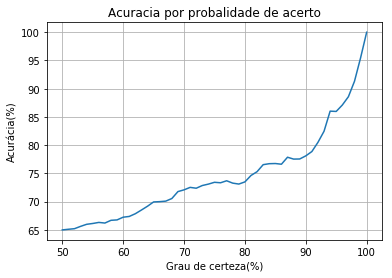

In [28]:
import matplotlib.pyplot as plt
a=0
alfa=[]
alf=[]
acc=[]
while a<=50:
    alfa.append(a)
    a+=1
for a in alfa:    
    alf.append(a/100)
for a in alf:
    acertos=len(comp_acertos[comp_acertos.bPredictProba<a])+len(comp_acertos[comp_acertos.bPredictProba>=1-a])
    total=len(dados_testes[dados_testes.bPredictProba<a])+len(dados_testes[dados_testes.bPredictProba>=1-a])
    if total==0:
        total=1
    if acertos==0:
        acertos=1
    acc.append(acertos*100/total)
plt.plot(100 - np.array(alfa),acc)
plt.ylabel('Acurácia(%)')
plt.xlabel('Grau de certeza(%)')
plt.title('Acurácia por Grau de certeza')
plt.grid()
plt.show()


___

### Dados concatenados X Dados não concatenados
##### Porque a análise com os dados não concatenados funcionou melhor que os dados não concatenados?

Como observado pelos resultados dos três classificadores acima, fica claro que a análise com os dados não concatenados possui uma acurácia maior do que a acurácia dos dados concatenados.

Isso occore pois os dads não concatenados consideram os adversários, havendo as respectivas informações de cada time, ou seja,  de cada um dos lados, determinantes na acurácia, haja vista a interferência do time adversário e sua probabilidade de vitória, importantes para classificar o resultado do jogo. Portanto, comparar as probabilidades de vitória respectivas dos times azul e vermelho em uma partida torna-se fundamental para obter melhoria nos classificadores utilizados.

## <font color='#00878A'>Lucião Bayes</font>

Este classificador foi criado pelo grupo, cujo objetivo foi obter os resultados probabilísticos e compará-los aos obtidos com os classificadores passados em aula pelo professor.
<p>
A priori, foram definidos dados nos quais o classificador iria basear-se, sendo eles: win rate de cada jogador, win rate de cada Champion e, por fim, o win rate de cada time. Para calculá-los, foi usada a planilha contendo os resultados e os dados de cada partida. Desta forma, foram calculadas as probabilidades de cada time para ganhar o jogo, as quais foram comparadas. O time que tivesse, pois, maior probabilidade de vitória seria o vencedor.

In [ ]:
team={}
for i in dados.blueTeamTag:
    team[i]=0
for i in dados.redTeamTag:
    team[i]=0
for k,v in team.items():
    wins=len(dados[(dados.blueTeamTag==k) & (dados.bResult==1)])+len(dados[(dados.redTeamTag==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTeamTag==k])+ len(dados[dados.redTeamTag==k])
    if matchs!=0:
        team[k]=wins/matchs


In [ ]:
top = {}
for i in dados.blueTopChamp:
    top[i]=0
for i in dados.redTopChamp:
    top[i]=0
for k,v in  top.items():
    wins=len(dados[(dados.blueTopChamp==k) & (dados.bResult==1)])+len(dados[(dados.redTopChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTopChamp==k])+ len(dados[dados.redTopChamp==k])      
    if matchs!=0:
        top[k]=wins/matchs


In [ ]:
jg = {}
for i in dados.blueJungleChamp:
    jg[i]=0
for i in dados.redJungleChamp:
    jg[i]=0
for k,v in  jg.items():
    wins=len(dados[(dados.blueJungleChamp==k) & (dados.bResult==1)])+len(dados[(dados.redJungleChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueJungleChamp==k])+ len(dados[dados.redJungleChamp==k])      
    if matchs!=0:
        jg[k]=wins/matchs


In [ ]:
mid = {}
for i in dados.blueMiddleChamp:
    mid[i]=0
for i in dados.redMiddleChamp:
    mid[i]=0
for k,v in  mid.items():
    wins=len(dados[(dados.blueMiddleChamp==k) & (dados.bResult==1)])+len(dados[(dados.redMiddleChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueMiddleChamp==k])+ len(dados[dados.redMiddleChamp==k])      
    if matchs!=0:
        mid[k]=wins/matchs


In [ ]:
adc = {}
for i in dados.blueADCChamp:
    adc[i]=0
for i in dados.redADCChamp:
    adc[i]=0
for k,v in  adc.items():
    wins=len(dados[(dados.blueADCChamp==k) & (dados.bResult==1)])+len(dados[(dados.redADCChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueADCChamp==k])+ len(dados[dados.redADCChamp==k])      
    if matchs!=0:
        adc[k]=wins/matchs


In [ ]:
sup = {}
for i in dados.blueSupportChamp:
    sup[i]=0
for i in dados.redSupportChamp:
    sup[i]=0
for k,v in  sup.items():
    wins=len(dados[(dados.blueSupportChamp==k) & (dados.bResult==1)])+len(dados[(dados.redSupportChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueSupportChamp==k])+ len(dados[dados.redSupportChamp==k])      
    if matchs!=0:
        sup[k]=wins/matchs


In [ ]:
top_player = {}
for i in dados.blueTop:
    top_player[i]=0
for i in dados.redTop:
    top_player[i]=0
for k,v in  top_player.items():
    wins=len(dados[(dados.blueTop==k) & (dados.bResult==1)])+len(dados[(dados.redTop==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTop==k])+ len(dados[dados.redTop==k])      
    if matchs!=0:
        top_player[k]=wins/matchs


In [ ]:
jg_player = {}
for i in dados.blueJungle:
    jg_player[i]=0
for i in dados.redJungle:
    jg_player[i]=0
for k,v in  jg_player.items():
    wins=len(dados[(dados.blueJungle==k) & (dados.bResult==1)])+len(dados[(dados.redJungle==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueJungle==k])+ len(dados[dados.redJungle==k])      
    if matchs!=0:
        jg_player[k]=wins/matchs


In [ ]:
mid_player = {}
for i in dados.blueMiddle:
    mid_player[i]=0
for i in dados.redMiddle:
    mid_player[i]=0
for k,v in  mid_player.items():
    wins=len(dados[(dados.blueMiddle==k) & (dados.bResult==1)])+len(dados[(dados.redMiddle==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueMiddle==k])+ len(dados[dados.redMiddle==k])      
    if matchs!=0:
        mid_player[k]=wins/matchs


In [ ]:
adc_player = {}
for i in dados.blueADC:
    adc_player[i]=0
for i in dados.redADC:
    adc_player[i]=0
for k,v in  adc_player.items():
    wins=len(dados[(dados.blueADC==k) & (dados.bResult==1)])+len(dados[(dados.redADC==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueADC==k])+ len(dados[dados.redADC==k])      
    if matchs!=0:
        adc_player[k]=wins/matchs


In [ ]:
sup_player = {}
for i in dados.blueSupport:
    sup_player[i]=0
for i in dados.redSupport:
    sup_player[i]=0
for k,v in  sup_player.items():
    wins=len(dados[(dados.blueSupport==k) & (dados.bResult==1)])+len(dados[(dados.redSupport==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueSupport==k])+ len(dados[dados.redSupport==k])      
    if matchs!=0:
        sup_player[k]=wins/matchs


Naive baiyes



In [ ]:
#dicionarios juntos
alls={}

for k,v in team.items():
    alls[k]=v

for k,v in top.items():
    alls[k]=v

for k,v in mid.items():
    if k not in mid.keys():
        alls[k]=v
    else:
        alls[k]=(v+mid[k])/2

for k,v in jg.items():
    if k not in jg.keys():
        alls[k]=v
    else:
        alls[k]=(v+jg[k])/2

for k,v in adc.items():
    if k not in adc.keys():
        alls[k]=v
    else:
        alls[k]=(v+adc[k])/2

for k,v in sup.items():
    if k not in sup.keys():
        alls[k]=v
    else:
        alls[k]=(v+sup[k])/2

for k,v in top_player.items():
    if k not in top_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+top_player[k])/2

for k,v in jg_player.items():
    if k not in jg_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+jg_player[k])/2

for k,v in mid_player.items():
    if k not in mid_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+mid_player[k])/2

for k,v in adc_player.items():
    if k not in adc_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+adc_player[k])/2

for k,v in sup_player.items():
    if k not in sup_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+sup_player[k])/2
    

In [ ]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

In [ ]:
wins=[]
for i in range(len(dados_testes)):
    probblue=1
    probred=1
    
    for f in columnsb:
        if dados_testes.loc[i,f] not in alls.keys():
            probblue*=0.5
        else:
            if alls[dados_testes.loc[i,f]]==0 or alls[dados_testes.loc[i,f]]==1:
                probblue*=0.5
            else:
                probblue*=alls[dados_testes.loc[i,f]]
    for f in columnsr:
        if dados_testes.loc[i,f] not in alls.keys():
            probred*=0.5
        else:
            if alls[dados_testes.loc[i,f]]==0 or alls[dados_testes.loc[i,f]]==1:
                probred*=0.5
            else:
                probred*=alls[dados_testes.loc[i,f]]
    if probblue<probred:
        wins.append(0)
    else:
        wins.append(1)

In [ ]:
#teste de qualidade
certo=0
total=0
for i in range(len(dados_testes)):
    if dados_testes.loc[i,'bResult']==wins[i]:
        certo+=1
        total+=1
    else:
        total+=1
print(100*certo/total,'%')
        

In [ ]:
print("Acurácia: {}".format(certo/total))

## Conclusão

Ao se comparar as diversas técnicas de classificação, chegamos à conclusão de que o classificador _Random Forrest_ é o que retornou a maior acurácia. Isso se dá porque ...

## <font color=red>COMPLETAR AQUI EM CIMA